In [88]:
import kagglehub
import numpy as np
import pandas
import scipy.linalg as la
from PIL import Image
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
from pathlib import Path

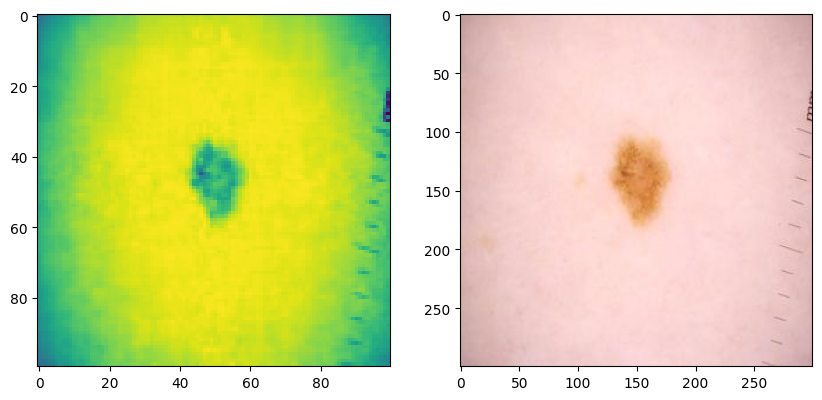

In [240]:
# example compression
img_ex = Image.open(path + "/melanoma_cancer_dataset/train/benign/melanoma_0.jpg")
img_small = img_ex.resize((100,100))
arr = np.array(img_small.getdata())
# new = np.zeros(len(arr))

# for j in range(len(arr)):
#   new[j] = compRGB(arr[j])
# print(new[0])
new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff

# conversion to matrix form
mat = new.reshape(img_small.size[0], img_small.size[1])


# # using PCA to project data to lower dim
# pca = PCA()
# pca.fit(mat)
# var = np.cumsum(pca.explained_variance_ratio_)*100
# # taking enough weight vectors for reasonable approx
# k = np.argmax(var>98)
k = 20
pca = PCA(n_components=k, svd_solver='randomized')
img_comp = pca.fit_transform(mat)
# ipca = IncrementalPCA(n_components = k)
# img_comp = ipca.fit_transform(mat)
img_recon = pca.inverse_transform(img_comp)

# converting to 2d form
flat = img_recon.flatten()

# vis for comparison
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(img_recon)

trainBenignPath = Path(path + "/melanoma_cancer_dataset/train/benign").rglob('*.jpg')
plt.subplot(1, 2, 2)
plt.imshow(img_ex, cmap='gray')



In [254]:
# pulling datasets from kaggle
path = kagglehub.dataset_download("hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images")
print("Path to dataset files:", path)

# assigning dataset folders
trainBenignPath = Path(path + "/melanoma_cancer_dataset/train/benign").rglob('*.jpg')
trainMaligPath = Path(path + "/melanoma_cancer_dataset/train/malignant").rglob('*.jpg')
testBenignPath = Path(path + "/melanoma_cancer_dataset/test/benign").rglob('*.jpg')
testMaligPath = Path(path + "/melanoma_cancer_dataset/test/malignant").rglob('*.jpg')




# performing compression on training set (benign)
benignList = list(trainBenignPath)
trainBenign = np.zeros(shape=(len(benignList), 10000))
for i in range(len(benignList)):
  if (i % 100 == 0):
    print(i)
  # read image and resize to 100x100
  img = Image.open(benignList[i]).resize((100,100))
  arr = np.array(img.getdata())
  new = np.zeros(len(arr))
  # converting rgb to array to singular normalised value
  new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff
  # conversion to matrix form
  mat = new.reshape(img.size[0], img.size[1])


  # # using PCA to project data to lower dim
  k=20
  pca = PCA(n_components=k, svd_solver='randomized')
  img_comp = pca.fit_transform(mat)
  image_recon = pca.inverse_transform(img_comp)

  # converting to 2d form
  flat = image_recon.flatten()
  trainBenign[i] = flat
# print(trainBenign[0])

# saving to disk
np.save('trainBenign.npy', trainBenign)







# performing compression on training set (malignant)
maligList = list(trainMaligPath)
trainMalig = np.zeros(shape=(len(maligList), 10000))
for i in range(len(maligList)):
  if (i % 100 == 0):
    print(i)
  # read image and resize to 100x100
  img = Image.open(maligList[i]).resize((100,100))
  arr = np.array(img.getdata())
  new = np.zeros(len(arr))
  # converting rgb to array to singular normalised value
  new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff
  # conversion to matrix form
  mat = new.reshape(img.size[0], img.size[1])


  # # using PCA to project data to lower dim
  k=20
  pca = PCA(n_components=k, svd_solver='randomized')
  img_comp = pca.fit_transform(mat)
  image_recon = pca.inverse_transform(img_comp)

  # converting to 2d form
  flat = image_recon.flatten()
  trainMalig[i] = flat
# print(trainMalig[0])

# saving to disk
np.save('trainMalig.npy', trainMalig)







# performing compression on testing set (malignant)
maligTestList = list(testMaligPath)
testMalig = np.zeros(shape=(len(maligTestList), 10000))
for i in range(len(maligTestList)):
  if (i % 100 == 0):
    print(i)
  # read image and resize to 100x100
  img = Image.open(maligTestList[i]).resize((100,100))
  arr = np.array(img.getdata())
  new = np.zeros(len(arr))
  # converting rgb to array to singular normalised value
  new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff
  # conversion to matrix form
  mat = new.reshape(img.size[0], img.size[1])


  # # using PCA to project data to lower dim
  k=20
  pca = PCA(n_components=k, svd_solver='randomized')
  img_comp = pca.fit_transform(mat)
  image_recon = pca.inverse_transform(img_comp)

  # converting to 2d form
  flat = image_recon.flatten()
  testMalig[i] = flat
# print(testMalig[0])

# saving to disk
np.save('testMalig.npy', testMalig)







# performing compression on testing set (benign)
benignTestList = list(testBenignPath)
testBenign = np.zeros(shape=(len(benignTestList), 10000))
for i in range(len(benignTestList)):
  if (i % 100 == 0):
    print(i)
  # read image and resize to 100x100
  img = Image.open(benignTestList[i]).resize((100,100))
  arr = np.array(img.getdata())
  new = np.zeros(len(arr))
  # converting rgb to array to singular normalised value
  new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff
  # conversion to matrix form
  mat = new.reshape(img.size[0], img.size[1])


  # # using PCA to project data to lower dim
  k=20
  pca = PCA(n_components=k, svd_solver='randomized')
  img_comp = pca.fit_transform(mat)
  image_recon = pca.inverse_transform(img_comp)

  # converting to 2d form
  flat = image_recon.flatten()
  testBenign[i] = flat
# print(testBenign[0])

# saving to disk
np.save('testBenign.npy', testBenign)

Path to dataset files: /root/.cache/kagglehub/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images/versions/1
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
0
100
200
300
400
0
100
200
300
400


[0.59058243 0.60711205 0.63139751 ... 0.55890985 0.54159041 0.51957639]


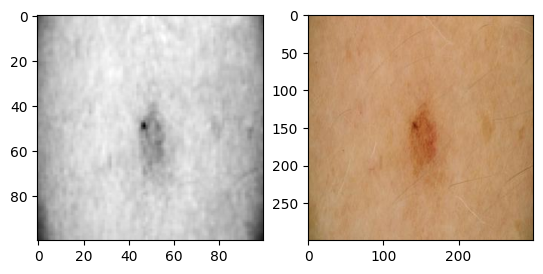

In [255]:
d = np.load("trainBenign.npy")
print(d[0])


plt.subplot(1, 2, 1)
# plt.figure(figsize=(3,3))
plt.imshow(d[0].reshape((100,100)), cmap='gray')

trainBenignPath = Path(path + "/melanoma_cancer_dataset/train/benign").rglob('*.jpg')
img = Image.open(next(trainBenignPath))
# plt.figure(figsize=(3,3))
plt.subplot(1, 2, 2)
plt.imshow(img)
